<b> Processo: Fábrica de Roupas </b>  <br>
<b> Entidade: Roupa </b>

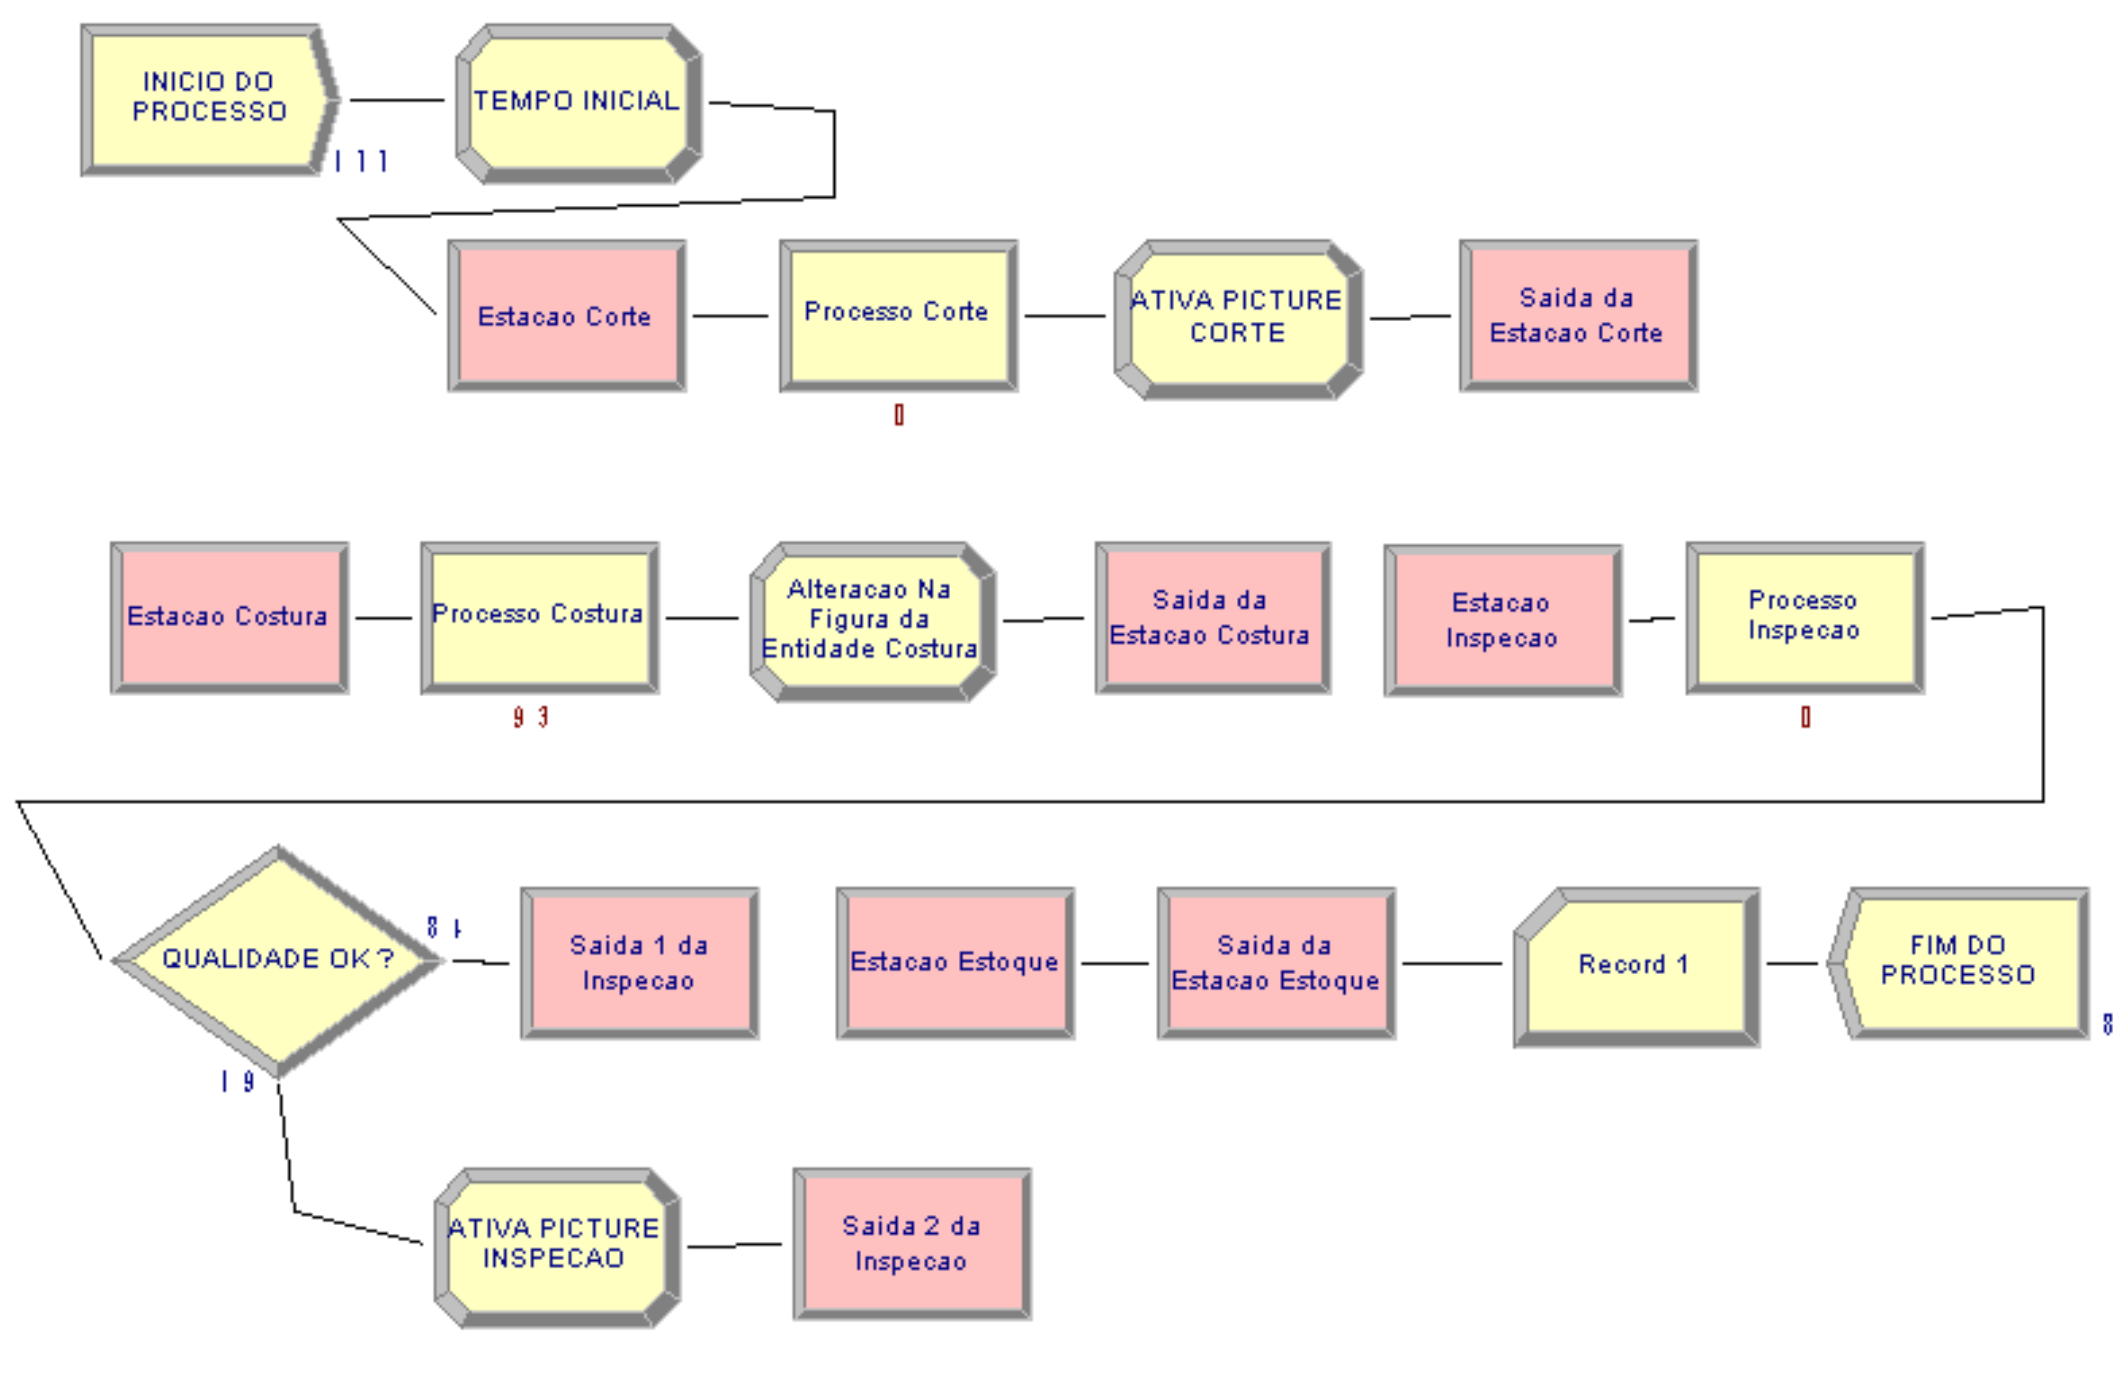

<p> O processo se iniciará pela estação de corte, depois de cortado o tecido vai para próxima estação a de costura, depois de costurado o tecido é inspecionado, se não estiver ok, ou seja, caso a inspeção detectar que a costura não esteja correta, o tecido volta para a estação de costura, se a inspeção não detectar nada o tecido está costurado corretamente, a roupa não está fora do padrão desejado, passando então para estação de estoque depois para saída da estação de estoque, que encerrará o processo. </p>

<b> 1) </b>  Analisar, compreender e descrever de forma simplificada os valores de entrada, as fases do processo (entrada/saída) e as respectivas saídas analisadas para o sistema de fábrica roupa executado.

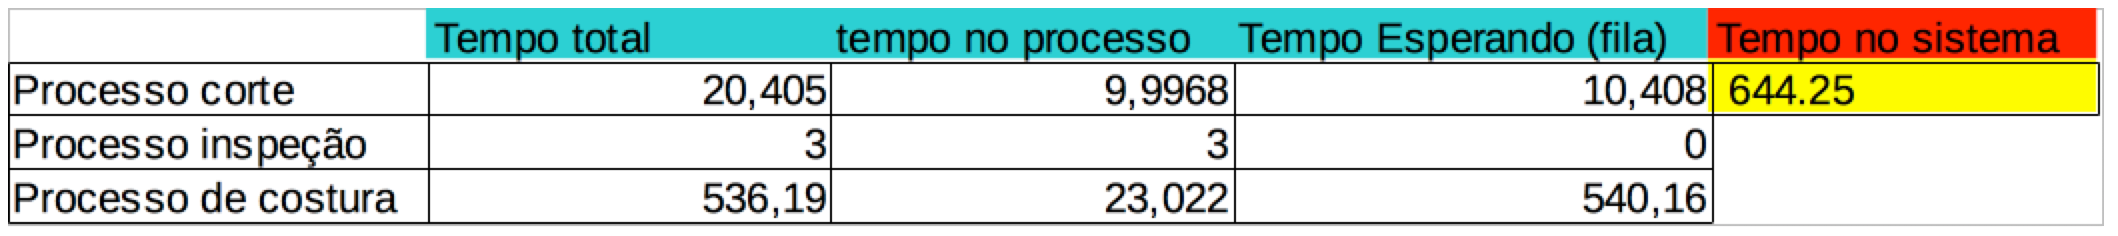

Inicialmente no processo de corte tempos o tempo total de 20,405, o tempo de processo é quase igual ao tempo esperando na fila. Para o processo de inspeção não apresenta-se fila logo o tempo de processo é exatamente igual ao tempo total. Analisando os tempos de processo, podemos concluir que o processo que mais demanda tempo é o processo de costura, porém, este processo está com tempo na fila muito grande caracterizando um problema um estudo e uma observação nesta etapa deverá ser realizado para detectar o que realmente está acontecendo.


<h3> Análise utilizando matplotlib </h3>

In [1]:
import numpy as np, re, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from io import StringIO

In [2]:
# Abre o arquivo do relatório
sis2 = open('random-data/sism2.out').readlines()

In [3]:
# Função responsável por extrair as tabelas do relatório
def get_lines(file, lines_range):
    lines = ''
    for line, block in enumerate(file):
        if line in lines_range and line != 2:
            lines += block
    return lines

In [4]:
# Define linhas das tabelas
blocks = [[14, 35], [39, 54,], [58, 81]]

In [5]:
# Extrai tabelas em dataframes utilizando regex (de maneira bem ineficiente, porém eficaz)
dataframes = []
for block in blocks:
    table = get_lines(sis2, [i for i in range(block[0], block[1])])
    table = re.sub(r'^(.\s_{99}\s\n\n(((\w|.|(|))\s))\n\s{11,}(\w))', '', table)
    table = re.sub(r'\s*\n', '\n', table)
    table = re.sub(r'\n_+', '', table)
    table = re.sub(r'(\s{2,})', ',', table)
    
    dataframes.append(pd.read_csv(StringIO(table), sep=',', encoding='utf8'))


In [6]:
processo = {
    "corte": [0, 1, 5],
    "inspecao": [2, 6, 8, 16],
    "costura": [3, 4, 9, 17],
    "roupa": [10, 11, 12, 13, 14, 15],
    "total": [7]
}

<h2> Análise do valor mínimo, médio e máximo </h2>

<h3> Processo de corte </h3>

In [7]:
corte = dataframes[0].iloc[processo["corte"]]

In [8]:
corte

,Identificador,Média,Meia Largura,Mínimo,Máximo,Observações
0,Processo Corte.TotalTimePerEntity,20.4050,(Insuf),8.3381,56.307,177
1,Processo Corte.VATimePerEntity,9.9968,(Insuf),8.1064,11.854,177
5,Processo Corte.WaitTimePerEntity,10.4080,(Insuf),0.0000,46.799,177


<Container object of 3 artists>

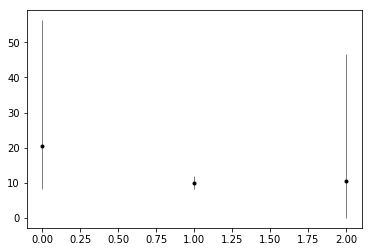

In [9]:
plt.errorbar(np.arange(3), corte["Média"], [corte["Média"] - corte["Mínimo"], corte["Máximo"] - corte["Média"]]
             ,fmt='.k', ecolor='gray', lw=1)

<p> <i>Há uma grande diferença do primeiro e terceiro ponto, enquanto há uma pequena variação do segundo. Considerando na média, o processo de corte possui um tempo considerável de espera, demorando mais que o tempo de serviço por entidade. É possível verificar que o tempo de corte no segundo tempo, não varia muito em relação a média</i> </p>

<h3> Processo de inspeção </h3>

In [10]:
inspecao = dataframes[0].iloc[processo["inspecao"]]

In [11]:
inspecao

,Identificador,Média,Meia Largura,Mínimo,Máximo,Observações
2,Processo Inspecao.TotalTimePerEntity,3.0,(Insuf),3.0,3.0,103
6,Processo Inspecao.VATimePerEntity,3.0,(Insuf),3.0,3.0,103
8,Processo Inspecao.WaitTimePerEntity,0.0,(Insuf),0.0,0.0,103
16,Processo Inspecao.Queue.WaitingTime,0.0,(Insuf),0.0,0.0,103


<Container object of 3 artists>

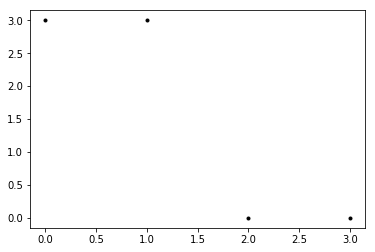

In [12]:
plt.errorbar(np.arange(4), inspecao["Média"], [inspecao["Média"] - inspecao["Mínimo"], inspecao["Máximo"] - inspecao["Média"]]
             ,fmt='.k', ecolor='gray', lw=1)

<p> <i>Nesse caso o valor médio dos pontos é igual ao valor mínimo/máximo.</i> </p>

<h3> Processo de costura </h3>

In [13]:
costura = dataframes[0].iloc[processo["costura"]]

In [14]:
costura

,Identificador,Média,Meia Largura,Mínimo,Máximo,Observações
3,Processo Costura.VATimePerEntity,23.022,(Insuf),18.351,27.716,103
4,Processo Costura.TotalTimePerEntity,563.190,(Insuf),26.142,1083.600,103
9,Processo Costura.WaitTimePerEntity,540.160,(Insuf),0.000,1063.400,103
17,Processo Costura.Queue.WaitingTime,545.250,(Insuf),0.000,1069.400,104


<Container object of 3 artists>

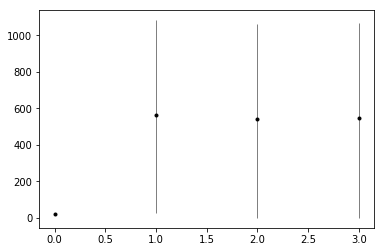

In [15]:
plt.errorbar(np.arange(4), costura["Média"], [costura["Média"] - costura["Mínimo"], costura["Máximo"] - costura["Média"]]
             ,fmt='.k', ecolor='gray', lw=1)

<p> <i>É possível verificar que o tempo de espera e de fila são extremamente altos e variantes. O tempo de serviço por entidade é sempre próximo ao valor médio.</i> </p>

<h3> Processo roupa </h3>

In [16]:
roupa = dataframes[0].iloc[processo["roupa"]]

In [17]:
roupa

,Identificador,Média,Meia Largura,Mínimo,Máximo,Observações
10,ROUPA.VATime,39.4020,(Insuf),31.072,93.302,84
11,ROUPA.NVATime,0.0000,(Insuf),0.000,0.000,84
12,ROUPA.WaitTime,598.3300,(Insuf),0.000,1456.900,84
13,ROUPA.TranTime,6.5238,(Insuf),6.000,14.000,84
14,ROUPA.OtherTime,0.0000,(Insuf),0.000,0.000,84
15,ROUPA.TotalTime,644.2500,(Insuf),44.837,1529.900,84


<Container object of 3 artists>

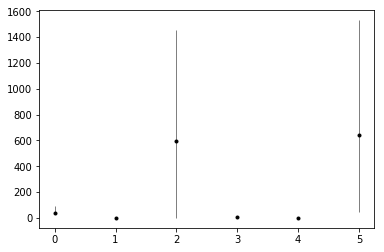

In [18]:
plt.errorbar(np.arange(6), roupa["Média"], [roupa["Média"] - roupa["Mínimo"], roupa["Máximo"] - roupa["Média"]]
             ,fmt='.k', ecolor='gray', lw=1)

<p> <i>É possível observar que o tempo de espera é extremamente alto, ocupando grande parte do tempo total</i> </p>

<h3> Tempo total no sistema</h3>

In [19]:
total = dataframes[0].iloc[processo["total"]]

In [20]:
total

,Identificador,Média,Meia Largura,Mínimo,Máximo,Observações
7,TEMPO NO SISTEMA,644.25,(Insuf),44.837,1529.9,84


<Container object of 3 artists>

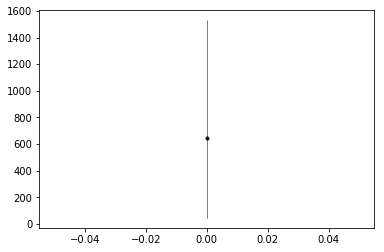

In [21]:
plt.errorbar(np.arange(1), total["Média"], [total["Média"] - total["Mínimo"], total["Máximo"] - total["Média"]]
             ,fmt='.k', ecolor='gray', lw=1)

<p> <i>É possível observar que o tempo total no sistema é extremamente variante</i> </p>

In [46]:
espera_acumulada_index = [3, 6, 0]

In [47]:
espera_acumulada = dataframes[2].iloc[espera_acumulada_index]

In [48]:
espera_acumulada

,Identificador,Valor
3,Processo Corte Accum Wait Time,1842.3
6,Processo Costura Accum Wait Time,55637.0
0,Processo Inspecao Accum Wait Time,0.0
